In [1]:
#importing local classes
import DataParser
#importing libraries
import os
import pandas as pd
import librosa
import librosa.display as librosa_display
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
data_parser = DataParser.DataParser()
random_file_pathes_for_each_number = list()
for i in range(5):
    random_file_path = data_parser.return_one_random_path_file(i+1)
    random_file_pathes_for_each_number.append(random_file_path)

returning file on this path  ./Data/Train/1/levan-gela-1c.wav which had samplin rate of 22050 , and length of data =  32458
returning file on this path  ./Data/Train/2/landg16-ori-4.wav which had samplin rate of 22050 , and length of data =  27072
returning file on this path  ./Data/Train/3/landg16-sami-1.wav which had samplin rate of 22050 , and length of data =  28224
returning file on this path  ./Data/Train/4/giorgi-chak-4a.wav which had samplin rate of 22050 , and length of data =  24461
returning file on this path  ./Data/Train/5/levan-gela-5b.wav which had samplin rate of 22050 , and length of data =  29636


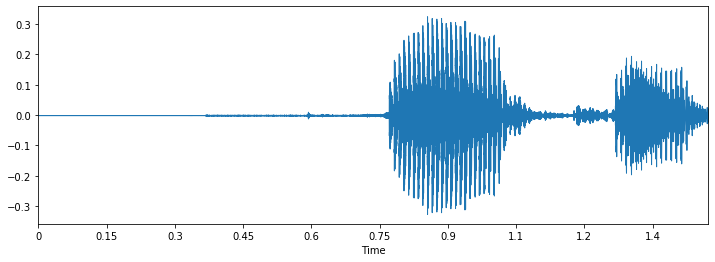

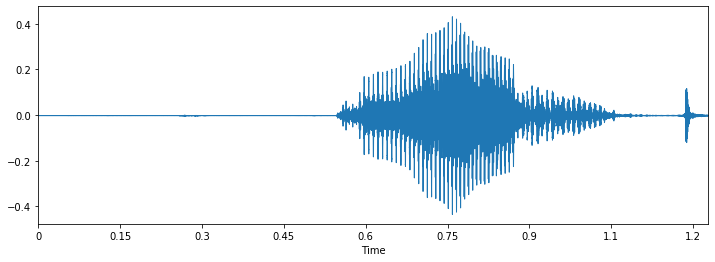

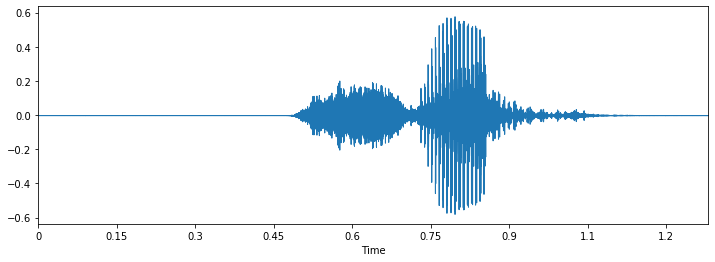

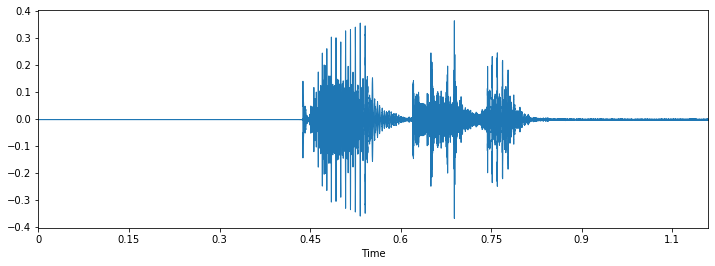

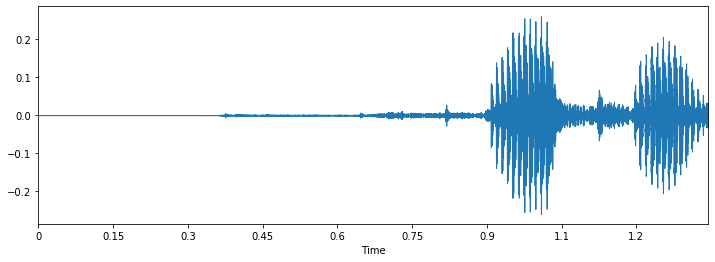

In [3]:
for random_file_path in random_file_pathes_for_each_number:
    data, sampling_rate = librosa.load(random_file_path)
    plt.figure(figsize=(12, 4))
    print("returning file on this path ", random_file_path, "which had samplin rate of", sampling_rate, ", and length of data = ", len(data))
    librosa_display.waveplot(data, sr=sampling_rate)